In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Numerical method of Runge-Kutta 
def ode4RungeKuttaSys(f,t,u0):
    u = np.zeros([len(t),len(u0)])
    u[0,:]=u0
    for n in range(0,len(t)-1):
        h=(t[n+1]-t[n])

        k1=h*f(t[n],u[n,:])
        k2=h*f(t[n]+0.5*h,u[n,:]+0.5*k1)
        k3=h*f(t[n]+0.5*h,u[n,:]+0.5*k2)
        k4=h*f(t[n]+h,u[n,:]+k3)

        u[n+1,:]=u[n,:]+(1/6)*(k1+2*k2+2*k3+k4)
    return u

In [11]:
# Initialization
n = 10  # Robots
t = np.arange(0, 15, 0.0001)    #Time
pos = 0  # Position
d = 10   # Desired distance
vel = 0  # Velocity
Mu = 1   # Friction's constant 

In [12]:
m=[]  # Mass
dreal=[]  # Real distance
for i in range(n):
    m.append(1) #### np.random.uniform(1, 10)
    dreal.append(np.random.uniform(1, 10))

# Initialization of the initial conditions
x0 = np.zeros(2 * n)  # [pos1, vel1, pos2, vel2, ..., posN, velN]

x0[0] = pos
x0[1] = vel
for i in range(n):
    x0[2*i] = pos + dreal[i]
    x0[2*i+1] = vel 
    pos = pos + dreal[i]

In [13]:
# PD Control
ks = 100
kd = 300

Step entrance

In [14]:
def dxdt(t, z):
    dxidt = np.zeros(2 * n)
    
    FuerzaU = 10 
    
    # Follower robot
    for i in range(n - 1):
        dxidt[2*i] = z[2*i+1] 
        dxidt[2*i+1] = (1/m[i])*(kd*(z[2*(i+1)+1]-z[2*i+1])-ks*(d-(z[2*(i+1)]-z[2*i]))-Mu*z[2*i+1])
    
    # Leader robot
    dxidt[2*(n-1)] = z[2*(n-1)+1]
    dxidt[2*(n-1)+1] = (1/m[n-1])*(FuerzaU-Mu*z[2*(n-1)+1])
    
    return dxidt

# Solution of the ODEs
x = ode4RungeKuttaSys(dxdt, t, x0)

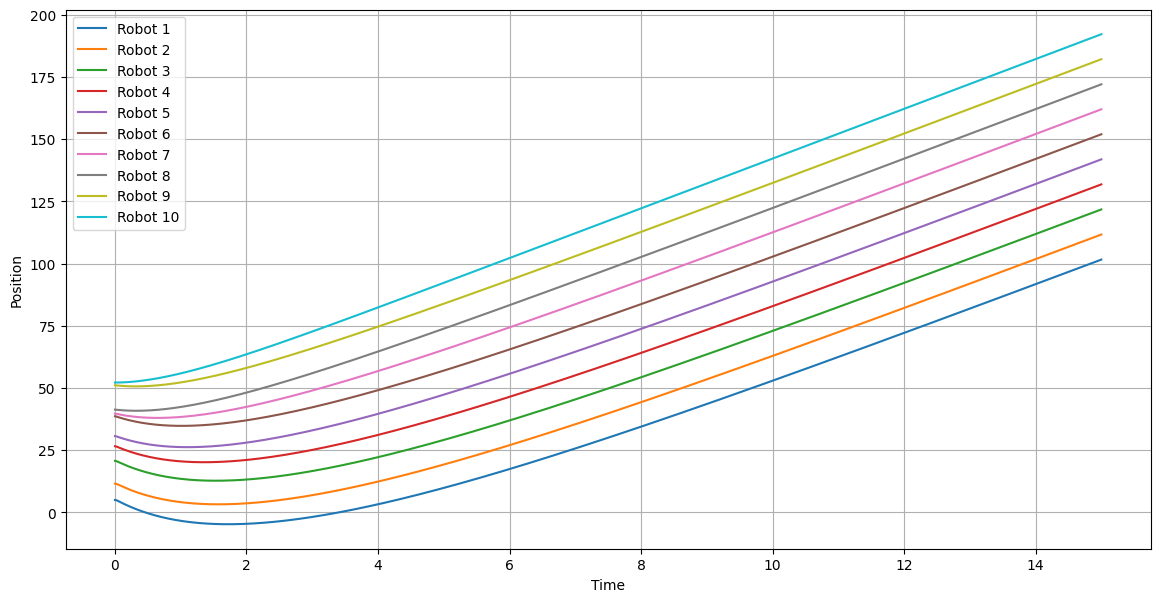

In [15]:
#Plot
plt.figure(figsize=(14, 7))
for i in range(n):
    plt.plot(t, x[:, 2 * i], label=f'Robot {i + 1}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

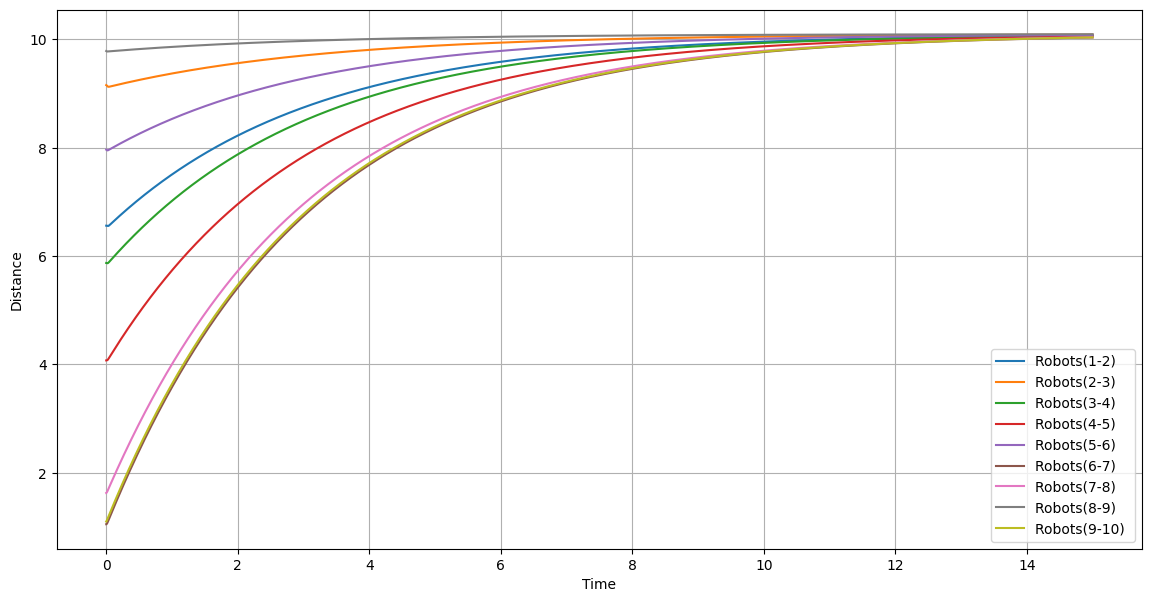

In [16]:
#Distance between each robot
plt.figure(figsize=(14, 7))
for i in range(n-1):
    plt.plot(t, x[:, 2*(i+1)]-x[:, 2*i], label=f'Robots({i+1}-{i+2}) ')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.grid()
plt.show()

Impulse entrance

In [18]:
def dxdt(t, z):
    dxidt = np.zeros(2 * n)

    #Impulse
    if 0 <= t < 0.01:
        FuerzaU = 10 
    else:
        FuerzaU = 0 

    for i in range(n - 1):
        # Follower robot
        dxidt[2 * i] = z[2 * i + 1] 
        dxidt[2 * i + 1] = (1 / m[i]) * (kd * (z[2 * (i + 1) + 1] - z[2 * i + 1]) - ks * (d - (z[2 * (i + 1)] - z[2 * i])) - Mu * z[2 * i + 1])
    
    # Leader robot
    dxidt[2 * (n - 1)] = z[2 * (n - 1) + 1] 
    dxidt[2 * (n - 1) + 1] = (1 / m[n - 1]) * (FuerzaU - Mu * z[2 * (n - 1) + 1])
    
    return dxidt

# Solution of the ODEs
x = ode4RungeKuttaSys(dxdt, t, x0)

c:\Users\Alejandro\Documents\CodePython\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


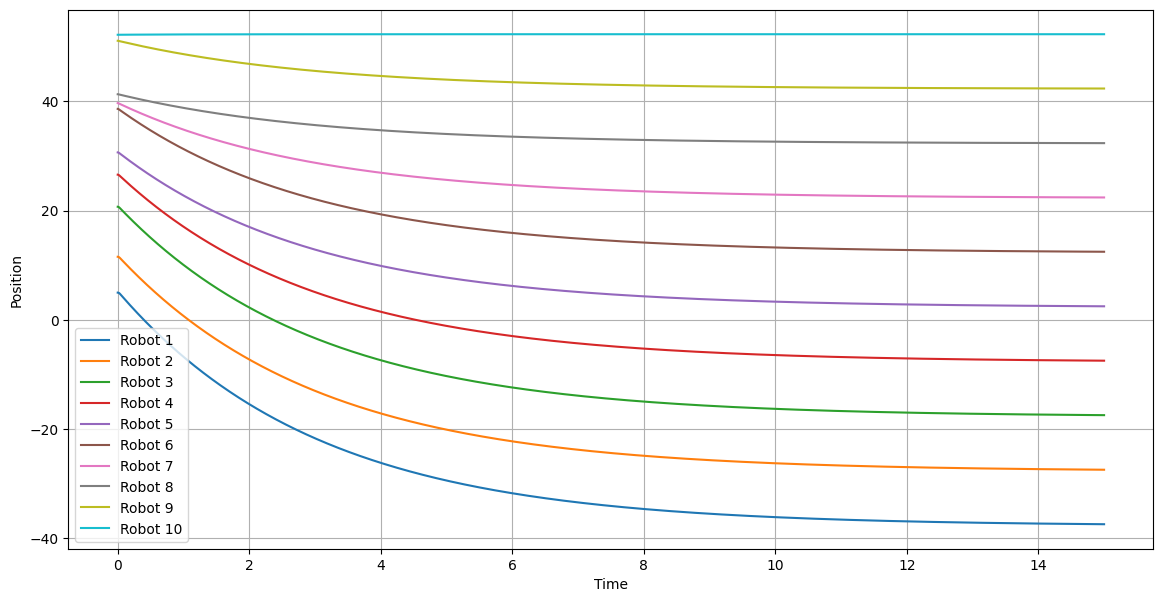

In [19]:
#Plot
plt.figure(figsize=(14, 7))
for i in range(n):
    plt.plot(t, x[:, 2 * i], label=f'Robot {i + 1}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

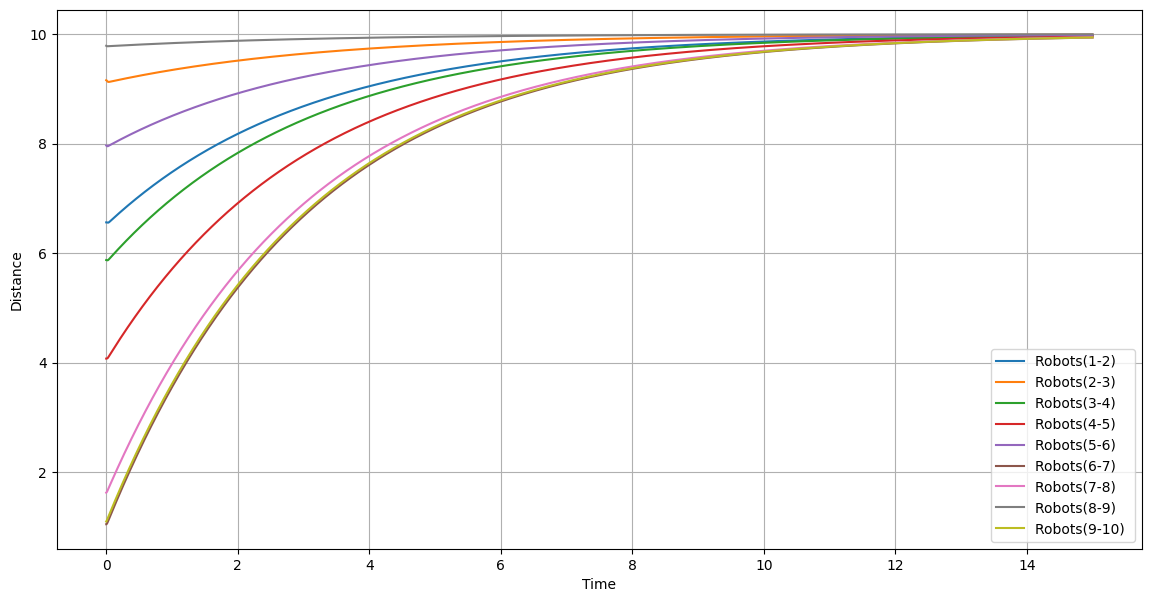

In [20]:
#Distance between each robot
plt.figure(figsize=(14, 7))
for i in range(n-1):
    plt.plot(t, x[:, 2*(i+1)]-x[:, 2*i], label=f'Robots({i+1}-{i+2}) ')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.grid()

Analysis of perturbations of initial conditions

In [44]:
# Initialization of system
n = 10  # Robots
d = 10   # Desired distance
Mu = 1   # Friction's constant 
m=[]  # Mass
dreal=[]  # Real distance
for i in range(n):
    m.append(1)
for i in range(n-1):
    if i==int(n/2):
        dreal.append(0)
    dreal.append(np.random.randint(0,21))

In [45]:
# Initialization of the initial conditions
d_variable = np.arange(0, 120, 10)   # Initial condition: Position
vel_variable = np.arange(0, 10, 2)  # Initial condition: Velocity
list_x0 = []

for j in range (len(d_variable)):
    for k in range (len(vel_variable)):
        x0 = np.zeros(2 * n)  # [pos1, vel1, pos2, vel2, ..., posN, velN]
        for i in range(n):
            if i==0:
                x0[0] = 0
                p = x0[0]
                x0[1] = 0
            else:
                if i==int(n/2):
                    x0[2*i] = p + d_variable[j] + dreal[i-1]
                    p = x0[2*i]
                    x0[2*i+1] = vel_variable[k]
                else:
                    x0[2*i] = p + dreal[i-1]
                    p = x0[2*i]
                    x0[2*i+1] = x0[1]
        list_x0.append(x0)

In [46]:
# PD Control
ks = 100
kd = 300

In [47]:
#Define time
t = np.arange(0, 10, 0.0005)    #Time

In [48]:
#Definition and solution of ODEs
def dxdt(t, z):
    dxidt = np.zeros(2 * n)
    
    FuerzaU = 10 
    
    # Follower robot
    for i in range(n - 1):
        dxidt[2*i] = z[2*i+1] 
        dxidt[2*i+1] = (1/m[i])*(kd*(z[2*(i+1)+1]-z[2*i+1])-ks*(d-(z[2*(i+1)]-z[2*i]))-Mu*z[2*i+1])
    
    # Leader robot
    dxidt[2*(n-1)] = z[2*(n-1)+1]
    dxidt[2*(n-1)+1] = (1/m[n-1])*(FuerzaU-Mu*z[2*(n-1)+1])
    
    return dxidt

list_x = []

# Solution of the ODEs
for i in range(len(list_x0)):
    x = ode4RungeKuttaSys(dxdt, t, list_x0[i])
    list_x.append(x)

Text(0, 0.5, 'Velocity of the leader robot')

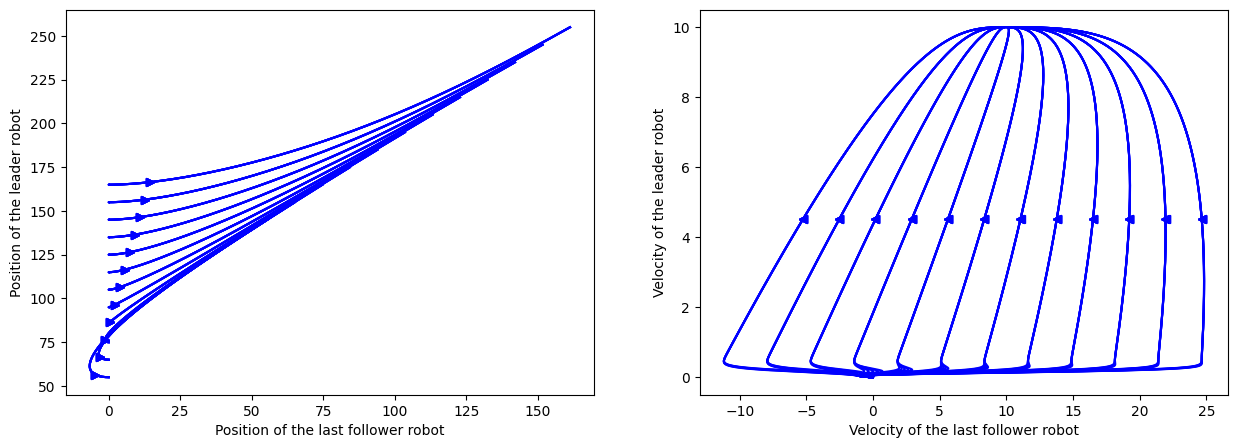

In [50]:
#Plot
j=0
k=0
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Position
for l in range(len(list_x)):
    axs[0].plot(list_x[l][:, 0], list_x[l][:, 2*(n-1)], marker='>', markevery=[1200], color='blue')
axs[0].set_xlabel(f'Position of the last follower robot')
axs[0].set_ylabel(f'Position of the leader robot')


#Velocity
for l in range(len(list_x)):
    axs[1].plot(list_x[l][:, 1], list_x[l][:, 2*n-1], marker='<', markevery=[1200], color='blue')
axs[1].set_xlabel(f'Velocity of the last follower robot')
axs[1].set_ylabel(f'Velocity of the leader robot')

Control disturbance analysis

In [51]:
# Initialization of the initial conditions
x0 = np.zeros(2 * n)  # [pos1, vel1, pos2, vel2, ..., posN, velN]
d_fija = 0
vel_fija = 0

x0[0] = d_fija
x0[1] = vel_fija
for i in range(n):
    x0[2*i] = d_fija + dreal[i]
    x0[2*i+1] = vel_fija 
    d_fija = d_fija + dreal[i]

In [72]:
# PD Control
ks = np.arange(0, 400, 100) 
kd = np.arange(200, 400, 50)

In [73]:
#Define time
t = np.arange(0, 15, 0.0005)    #Time

In [74]:
list_x = []

for j in range(len(ks)):
    for k in range(len(kd)):
        #Definition and solution of ODEs
        def dxdt(t, z):
            dxidt = np.zeros(2 * n)
    
            FuerzaU = 10 
    
            # Follower robot
            for i in range(n - 1):
                dxidt[2*i] = z[2*i+1] 
                dxidt[2*i+1] = (1/m[i])*(kd[k]*(z[2*(i+1)+1]-z[2*i+1])-ks[j]*(d-(z[2*(i+1)]-z[2*i]))-Mu*z[2*i+1])
    
            # Leader robot
            dxidt[2*(n-1)] = z[2*(n-1)+1]
            dxidt[2*(n-1)+1] = (1/m[n-1])*(FuerzaU-Mu*z[2*(n-1)+1])
    
            return dxidt

        # Solution of the ODEs
        x = ode4RungeKuttaSys(dxdt, t, x0)
        list_x.append(x)

Text(0, 0.5, 'Velocity of the leader robot')

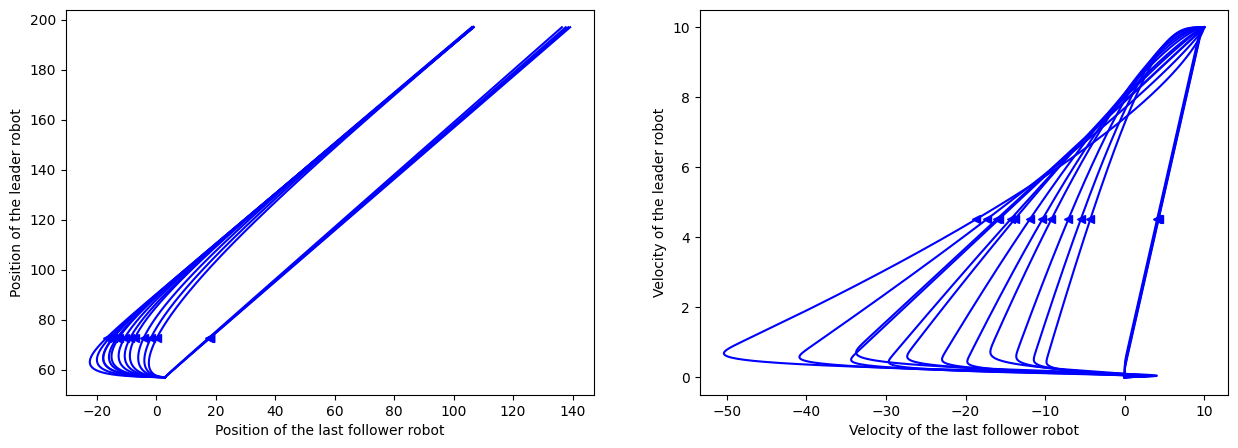

In [75]:
#Plot
if (n-1)%3 != 0 :
    if n<4:
        size=1
    else:
        size=int((n-1)/3)+1
else:
    size=int((n-1)/3)
    
j=0
k=0
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Position
for l in range(len(list_x)):
    axs[0].plot(list_x[l][:, 0], list_x[l][:, 2*(n-1)], marker='<', markevery=[5000], color='blue')
axs[0].set_xlabel(f'Position of the last follower robot')
axs[0].set_ylabel(f'Position of the leader robot')


#Velocity
for l in range(len(list_x)):
    axs[1].plot(list_x[l][:, 1], list_x[l][:, 2*n-1], marker='<', markevery=[1200], color='blue')
axs[1].set_xlabel(f'Velocity of the last follower robot')
axs[1].set_ylabel(f'Velocity of the leader robot')